In [140]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

가구원수 데이터 분석

In [64]:
family = pd.read_csv('./data/가구원수별가구수.txt', sep='\t', header=1)
family.head()

,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
0,2019,합계,"3,896,389","1,299,787","1,005,065","801,819","614,026","138,596","29,336","7,760",2.3
1,2019,종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
2,2019,중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
3,2019,용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2
4,2019,성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253,2.3


In [65]:
family.isnull().values.any()
# 모든자료가 있다.

False

In [66]:
family['구분'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype=object)

In [67]:
del family['기간']
family.drop([0], inplace= True)
family.rename({'구분' : '구별','일반가구수':'총인구수'}, inplace= True, axis =1)
family.set_index('구별', inplace=True)
family.head()

,총인구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
구별,,,,,,,,,
종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2
성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253,2.3
광진구,"149,905","58,714","35,678","28,054","21,454","4,711","1,006",288,2.2


In [69]:
#타입 확인
family.dtypes

총인구수       object
1인         object
2인         object
3인         object
4인         object
5인         object
6인         object
7인 이상      object
평균가구원수    float64
dtype: object

In [70]:
#정수로 전환+ 불필요한 , 제거
family['총인구수'] = family['총인구수'].map(lambda s: int(s.replace(',','')))
family['1인'] = family['1인'].map(lambda s: int(s.replace(',','')))
family['2인'] = family['2인'].map(lambda s: int(s.replace(',','')))
family['3인'] = family['3인'].map(lambda s: int(s.replace(',','')))
family['4인'] = family['4인'].map(lambda s: int(s.replace(',','')))
family['5인'] = family['5인'].map(lambda s: int(s.replace(',','')))
family['6인'] = family['6인'].map(lambda s: int(s.replace(',','')))
family['7인 이상'] = family['7인 이상'].map(lambda s: int(s.replace(',','')))
family.head()

,총인구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
구별,,,,,,,,,
종로구,62652,24671,16208,11154,7828,2143,505,143,2.2
중구,54496,22078,14578,9540,6292,1533,373,102,2.1
용산구,93177,35148,25164,17439,11736,2907,612,171,2.2
성동구,122770,41488,32125,25634,18379,4014,877,253,2.3
광진구,149905,58714,35678,28054,21454,4711,1006,288,2.2


In [71]:
#1인 가구의 비율이 높은 구 
family['1인비율'] = family['1인'] / family['총인구수'] *100
family.tail()

,총인구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수,1인비율
구별,,,,,,,,,,
관악구,242154,119863,55423,34875,24563,5806,1283,341,2.0,49.498666
서초구,155377,42667,38892,35327,29850,6704,1503,434,2.5,27.460306
강남구,206524,66073,51560,43435,35800,7671,1564,421,2.4,31.992892
송파구,252212,68861,65402,57821,47607,10014,2038,469,2.5,27.302825
강동구,162976,45188,43297,36735,29461,6606,1333,356,2.5,27.726782


In [72]:
family.sort_values('1인비율', ascending=False).head()


,총인구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수,1인비율
구별,,,,,,,,,,
관악구,242154,119863,55423,34875,24563,5806,1283,341,2.0,49.498666
중구,54496,22078,14578,9540,6292,1533,373,102,2.1,40.513065
종로구,62652,24671,16208,11154,7828,2143,505,143,2.2,39.377833
동대문구,148349,58152,36060,27436,20168,4988,1204,341,2.2,39.199455
광진구,149905,58714,35678,28054,21454,4711,1006,288,2.2,39.167473


In [73]:
family['3인이상'] = family['3인']+family['4인']+family['5인']+family['6인']+family['7인 이상']
family.head()

,총인구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수,1인비율,3인이상
구별,,,,,,,,,,,
종로구,62652,24671,16208,11154,7828,2143,505,143,2.2,39.377833,21773
중구,54496,22078,14578,9540,6292,1533,373,102,2.1,40.513065,17840
용산구,93177,35148,25164,17439,11736,2907,612,171,2.2,37.721755,32865
성동구,122770,41488,32125,25634,18379,4014,877,253,2.3,33.793272,49157
광진구,149905,58714,35678,28054,21454,4711,1006,288,2.2,39.167473,55513


In [74]:
del family['4인']
del family['5인']
del family['6인']
del family['7인 이상']
del family['2인']

In [77]:
# 3인 가구 비율이 가장 높은 구
family['3인이상비율'] = family['3인이상'] / family['총인구수'] *100
family.sort_values('3인이상비율',ascending=False).head()

,총인구수,1인,3인,평균가구원수,1인비율,3인이상,3인이상비율
구별,,,,,,,
양천구,162867,36345,40897,2.6,22.315755,85087,52.243241
서초구,155377,42667,35327,2.5,27.460306,73818,47.508962
노원구,201458,53365,46783,2.5,26.489392,95261,47.285787
송파구,252212,68861,57821,2.5,27.302825,117949,46.765816
강동구,162976,45188,36735,2.5,27.726782,74491,45.706730


인구현황데이터 분석

In [94]:
pop = pd.read_csv('./data/report.txt', sep='\t',header=2)[['자치구','65세이상고령자','세대당인구']]
pop.head()

,자치구,65세이상고령자,세대당인구
0,합계,"1,552,356",2.20
1,종로구,"28,396",2.00
2,중구,"24,265",1.98
3,용산구,"39,995",2.04
4,성동구,"45,372",2.17


In [95]:
pop.rename({'자치구':'구별','65세이상고령자':'고령자'},inplace=True, axis =1)
pop['고령자'] = pop['고령자'].map(lambda s: int(s.replace(',','')))
pop.drop([0], inplace=True)
pop.head()

,구별,고령자,세대당인구
1,종로구,28396,2.00
2,중구,24265,1.98
3,용산구,39995,2.04
4,성동구,45372,2.17
5,광진구,50047,2.09


In [97]:
df =pd.merge(family,pop, on = '구별')
df.head()

,구별,총인구수,1인,3인,평균가구원수,1인비율,3인이상,3인이상비율,고령자,세대당인구
0,종로구,62652,24671,11154,2.2,39.377833,21773,34.752282,28396,2.00
1,중구,54496,22078,9540,2.1,40.513065,17840,32.736348,24265,1.98
2,용산구,93177,35148,17439,2.2,37.721755,32865,35.271580,39995,2.04
3,성동구,122770,41488,25634,2.3,33.793272,49157,40.039912,45372,2.17
4,광진구,149905,58714,28054,2.2,39.167473,55513,37.032120,50047,2.09


In [165]:
#고령자의 비율이 높은 구
df['고령자비율'] = df['고령자'] / df['총인구수'] *100
df.sort_values('고령자비율').tail() # 낮은구 순서-젊은이가 많은 구

,구별,총인구수,1인,3인,평균가구원수,1인비율,3인이상,3인이상비율,고령자,세대당인구,고령자비율
1,중구,54496,22078,9540,2.1,40.513065,17840,32.736348,24265,1.98,44.526204
0,종로구,62652,24671,11154,2.2,39.377833,21773,34.752282,28396,2.00,45.323374
11,은평구,184890,52814,40789,2.4,28.565093,79819,43.171075,84353,2.26,45.623344
9,도봉구,126831,32653,29580,2.5,25.745283,57849,45.611089,61388,2.35,48.401416
8,강북구,128012,42791,25967,2.3,33.427335,49782,38.888542,62951,2.13,49.175859


사업체수 데이터 분석

In [112]:
com = pd.read_csv('./data/사업체수.txt', sep='\t', header=2)[['자치구','계','대기업']]

com.head()

,자치구,계,대기업
0,서울시,"776,357","1,662"
1,종로구,"37,507",120
2,중구,"58,766",260
3,용산구,"19,538",57
4,성동구,"26,466",27


In [115]:
com.rename({'자치구':'구별','계':'사업체수'}, inplace= True, axis =1)
com.head()

,구별,사업체수,대기업
0,서울시,"776,357","1,662"
1,종로구,"37,507",120
2,중구,"58,766",260
3,용산구,"19,538",57
4,성동구,"26,466",27


In [117]:
com['사업체수'] = com['사업체수'].map(lambda s: int(s.replace(',','')))
com['대기업'] = com['대기업'].map(lambda s: int(s.replace(',','')))
com.head()

,구별,사업체수,대기업
0,서울시,776357,1662
1,종로구,37507,120
2,중구,58766,260
3,용산구,19538,57
4,성동구,26466,27


In [121]:
com.sort_values('사업체수',ascending=False).head(10)

,구별,사업체수,대기업
0,서울시,776357,1662
23,강남구,67372,417
2,중구,58766,260
24,송파구,45147,79
22,서초구,42976,168
19,영등포구,40014,171
1,종로구,37507,120
17,구로구,36781,46
16,강서구,36283,51
14,마포구,35113,84


In [122]:
#대기업이 많은 구
com.sort_values('대기업',ascending=False).head(10)

,구별,사업체수,대기업
0,서울시,776357,1662
23,강남구,67372,417
2,중구,58766,260
19,영등포구,40014,171
22,서초구,42976,168
1,종로구,37507,120
14,마포구,35113,84
24,송파구,45147,79
3,용산구,19538,57
18,금천구,31135,56


In [158]:
df1 =pd.merge(df,com, on = '구별')
df1.head()

,구별,총인구수,1인,3인,평균가구원수,1인비율,3인이상,3인이상비율,고령자,세대당인구,고령자비율,사업체수,대기업
0,종로구,62652,24671,11154,2.2,39.377833,21773,34.752282,28396,2.00,45.323374,37507,120
1,중구,54496,22078,9540,2.1,40.513065,17840,32.736348,24265,1.98,44.526204,58766,260
2,용산구,93177,35148,17439,2.2,37.721755,32865,35.271580,39995,2.04,42.923683,19538,57
3,성동구,122770,41488,25634,2.3,33.793272,49157,40.039912,45372,2.17,36.956911,26466,27
4,광진구,149905,58714,28054,2.2,39.167473,55513,37.032120,50047,2.09,33.385811,23270,11


상관관계 분석

In [135]:
#1인비율과 3인이상비율의 관계
np.corrcoef(df1['3인이상비율'], df1['1인비율'])  
#-->1인 비율이 3인이상을 합한 인구비율보다 조금 더 높음을 알수있다.(그만큼 1인가구의 비중이 높다는 것으로 추정)

array([[ 1.        , -0.97722175],
       [-0.97722175,  1.        ]])

In [101]:
#구별 고령자비율과 1인비율 
np.corrcoef(df1['고령자비율'], df1['1인비율']) 

array([[ 1.        , -0.31715821],
       [-0.31715821,  1.        ]])

In [111]:
#구별 고령자비율과 3인이상비율

np.corrcoef(df1['고령자비율'], df1['3인이상비율'])

array([[1.       , 0.1577928],
       [0.1577928, 1.       ]])

In [ ]:
#--> 1인 가구에 고령자의 비율은 3인이상보다 낮고, 음의 상관관계로, 아직은 3인이상의 가구에 노인이 많은것으로 추정.

In [126]:
#구별 1인비율과 대기업 수  
np.corrcoef(df1['대기업'], df1['1인비율']) 

array([[1.        , 0.09601637],
       [0.09601637, 1.        ]])

In [130]:
#구별 3인비율과 대기업수

np.corrcoef(df1['대기업'], df1['3인이상비율'])

array([[ 1.        , -0.07332472],
       [-0.07332472,  1.        ]])

In [131]:
np.corrcoef(df1['사업체수'], df1['1인비율'])

array([[1.        , 0.03596883],
       [0.03596883, 1.        ]])

In [133]:
np.corrcoef(df1['사업체수'], df1['3인이상비율'])

array([[ 1.        , -0.00748115],
       [-0.00748115,  1.        ]])

In [177]:
#df1.set_index('구별',inplace=True)
#df1.head()

In [176]:
#사업체수별 1인비율
df1['사업종사자1인비율'] = df1['1인비율'] / df1['사업체수'] * 100
df1.sort_values('사업종사자1인비율',ascending=False).head(15)

,총인구수,1인,3인,평균가구원수,1인비율,3인이상,3인이상비율,고령자,세대당인구,고령자비율,사업체수,대기업,1인사업종사자비율,사업종사자1인비율
구별,,,,,,,,,,,,,,
관악구,242154,119863,34875,2.0,49.498666,66868,27.613833,78206,1.81,32.295977,24480,8,0.202200,0.202200
동작구,164963,60088,32514,2.3,36.425138,64136,38.879021,64674,2.14,39.205155,18434,16,0.197598,0.197598
서대문구,128635,46449,25283,2.3,36.109146,49605,38.562600,53869,2.17,41.877405,18333,17,0.196963,0.196963
용산구,93177,35148,17439,2.2,37.721755,32865,35.271580,39995,2.04,42.923683,19538,57,0.193069,0.193069
강북구,128012,42791,25967,2.3,33.427335,49782,38.888542,62951,2.13,49.175859,17691,3,0.188951,0.188951
광진구,149905,58714,28054,2.2,39.167473,55513,37.032120,50047,2.09,33.385811,23270,11,0.168317,0.168317
성북구,176729,57832,37033,2.4,32.723548,74454,42.128909,73370,2.25,41.515541,21675,2,0.150974,0.150974
도봉구,126831,32653,29580,2.5,25.745283,57849,45.611089,61388,2.35,48.401416,17689,6,0.145544,0.145544
동대문구,148349,58152,27436,2.2,39.199455,54137,36.493000,61408,2.06,41.394280,30314,16,0.129311,0.129311


In [178]:
del df1['1인사업종사자비율']

In [134]:
# --> 사업체수가 많을수록 1인가구비율이 높음을 알수있다.(특히 대기업일 수록 더 많은 상관관계를 지닌다.)

In [136]:
# 추정 : 1인가구는 대기업이 많은 구에 비중이 더 많을 수 있다./ 혼자 사는 노인보다는 젊은 층일 확률이 높다. 

In [180]:
df_arr = df1[['1인비율','3인이상비율','고령자비율','사업체수','대기업','사업종사자1인비율']]
df_corr =df_arr.corr()
df_corr

,1인비율,3인이상비율,고령자비율,사업체수,대기업,사업종사자1인비율
1인비율,1.000000,-0.977222,-0.317158,0.035969,0.096016,0.448344
3인이상비율,-0.977222,1.000000,0.157793,-0.007481,-0.073325,-0.463438
고령자비율,-0.317158,0.157793,1.000000,-0.258803,-0.175751,0.098697
사업체수,0.035969,-0.007481,-0.258803,1.000000,0.909386,-0.802339
대기업,0.096016,-0.073325,-0.175751,0.909386,1.000000,-0.600659
사업종사자1인비율,0.448344,-0.463438,0.098697,-0.802339,-0.600659,1.000000


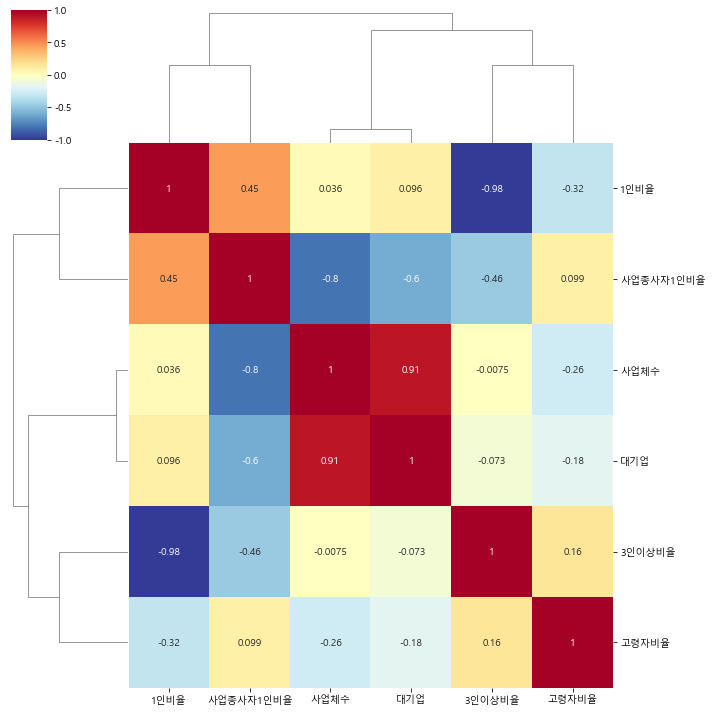

In [188]:
sns.clustermap(df_corr, 
               annot = True,        # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',   # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
)

그래프 분석하기

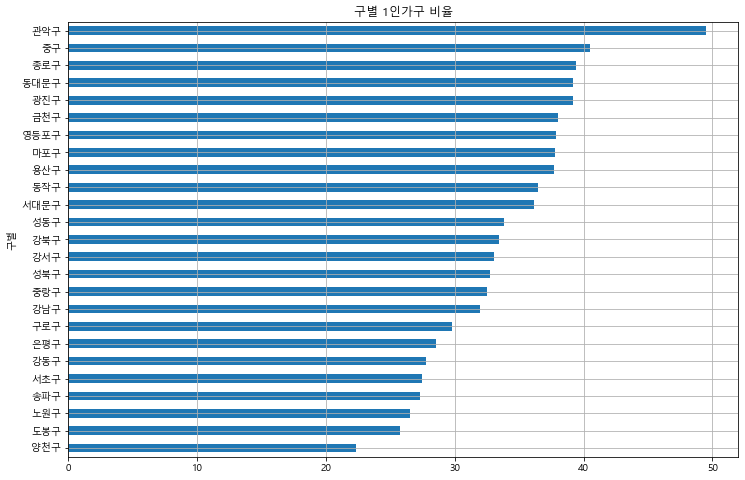

In [147]:
df1['1인비율'].sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='구별 1인가구 비율')
plt.show()

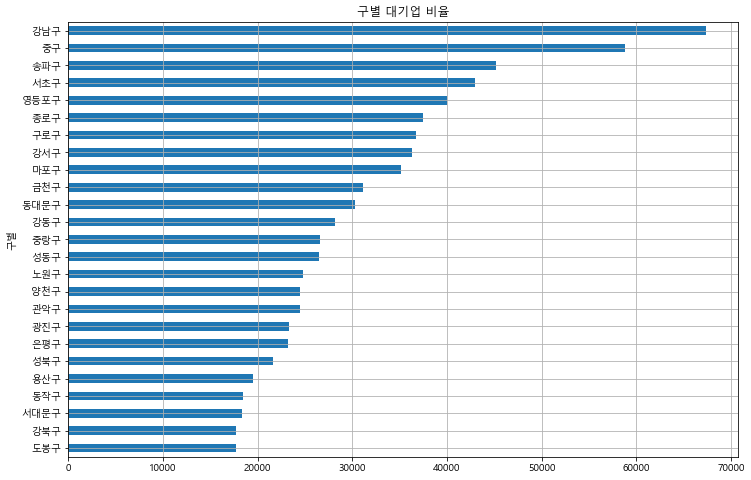

In [182]:
df1['사업체수'].sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='구별 대기업 비율')
plt.show()

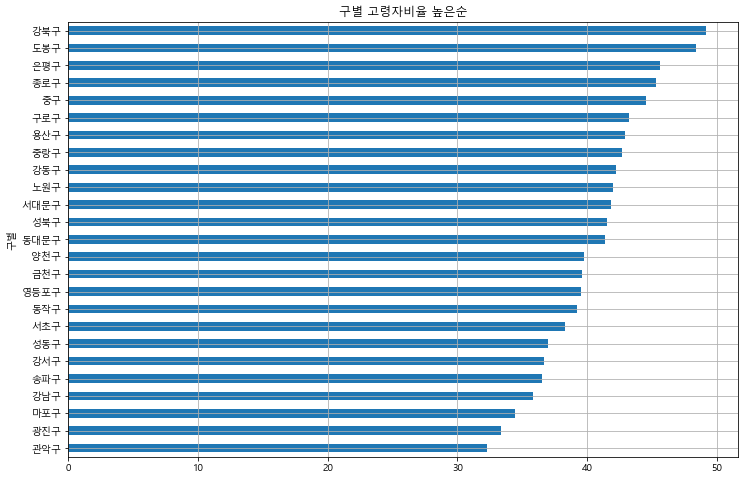

In [164]:
df1['고령자비율'].sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='구별 고령자비율 높은순')
plt.show()

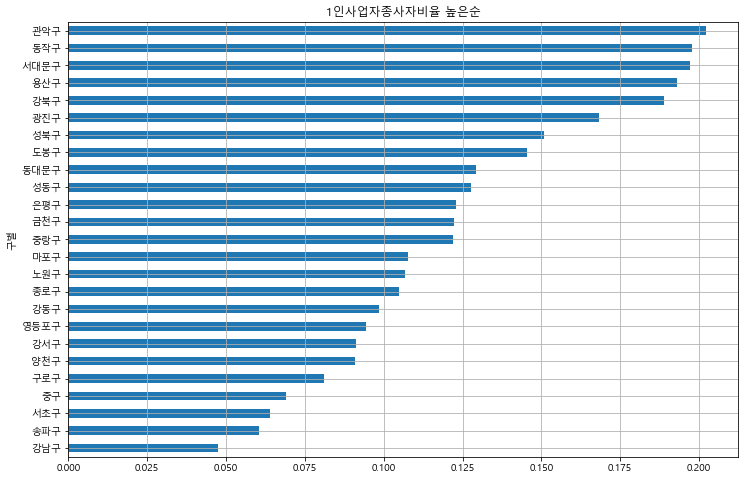

In [162]:
df1['사업종사자1인비율'].sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='사업종사하는 1인비율 높은순')
plt.show()

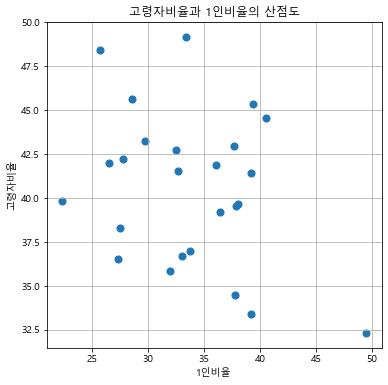

In [193]:
plt.figure(figsize=(6,6))
plt.scatter(df1['1인비율'], df1['고령자비율'], s=50)

plt.grid(True)
plt.title('고령자비율과 1인비율의 산점도')
plt.xlabel('1인비율')
plt.ylabel('고령자비율')
plt.show()

In [189]:
#선 그리기
fp1 = np.polyfit(df1['1인비율'], df1['고령자비율'], 1)
fp1

array([-0.22922551, 48.28015985])

In [199]:
fx = np.array([25, 50])
f1 = np.poly1d(fp1)
fy = f1(fx)
fy

array([42.54952218, 36.81888451])

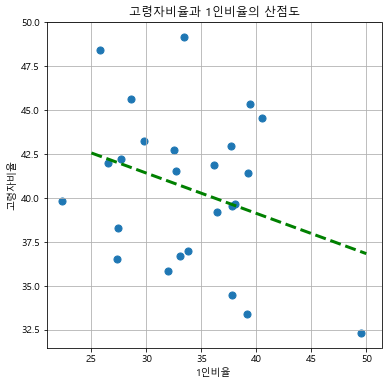

In [200]:
plt.figure(figsize=(6,6))
plt.scatter(df1['1인비율'], df1['고령자비율'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')
plt.grid(True)
plt.title('고령자비율과 1인비율의 산점도')
plt.xlabel('1인비율')
plt.ylabel('고령자비율')
plt.show()

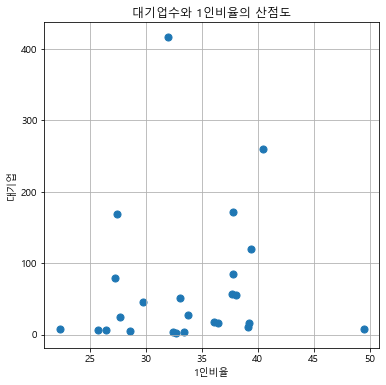

In [194]:
#사업체수와 대기업수가 비슷하게 움직이므로..편차가 큰 대기업으로 하자.
plt.figure(figsize=(6,6))
plt.scatter(df1['1인비율'], df1['대기업'], s=50)
#plt.plot(fx, fy, ls='dashed', lw=3, color='g')
plt.grid(True)
plt.title('대기업수와 1인비율의 산점도')
plt.xlabel('1인비율')
plt.ylabel('대기업')
plt.show()

In [195]:
fp2 = np.polyfit(df1['1인비율'], df1['대기업'], 1)
fp2

array([ 1.55308241, 14.01911858])

In [196]:
fx = np.array([25, 50])
f2 = np.poly1d(fp2)
fy = f2(fx)
fy

array([52.84617871, 91.67323884])

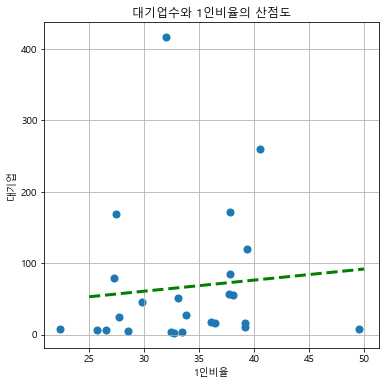

In [198]:
plt.figure(figsize=(6,6))
plt.scatter(df1['1인비율'], df1['대기업'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')
plt.grid(True)
plt.title('대기업수와 1인비율의 산점도')
plt.xlabel('1인비율')
plt.ylabel('대기업')
plt.show()

In [205]:
df1['오차'] = np.abs(df1['고령자비율'] - f1(df1['1인비율']))
df_sort = df1.sort_values('오차', ascending=False)
df_sort.head()

,총인구수,1인,3인,평균가구원수,1인비율,3인이상,3인이상비율,고령자,세대당인구,고령자비율,사업체수,대기업,사업종사자1인비율,오차
구별,,,,,,,,,,,,,,
강북구,128012,42791,25967,2.3,33.427335,49782,38.888542,62951,2.13,49.175859,17691,3,0.188951,8.558096
종로구,62652,24671,11154,2.2,39.377833,21773,34.752282,28396,2.00,45.323374,37507,120,0.104988,6.069617
도봉구,126831,32653,29580,2.5,25.745283,57849,45.611089,61388,2.35,48.401416,17689,6,0.145544,6.022732
광진구,149905,58714,28054,2.2,39.167473,55513,37.032120,50047,2.09,33.385811,23270,11,0.168317,5.916165
중구,54496,22078,9540,2.1,40.513065,17840,32.736348,24265,1.98,44.526204,58766,260,0.068940,5.532672


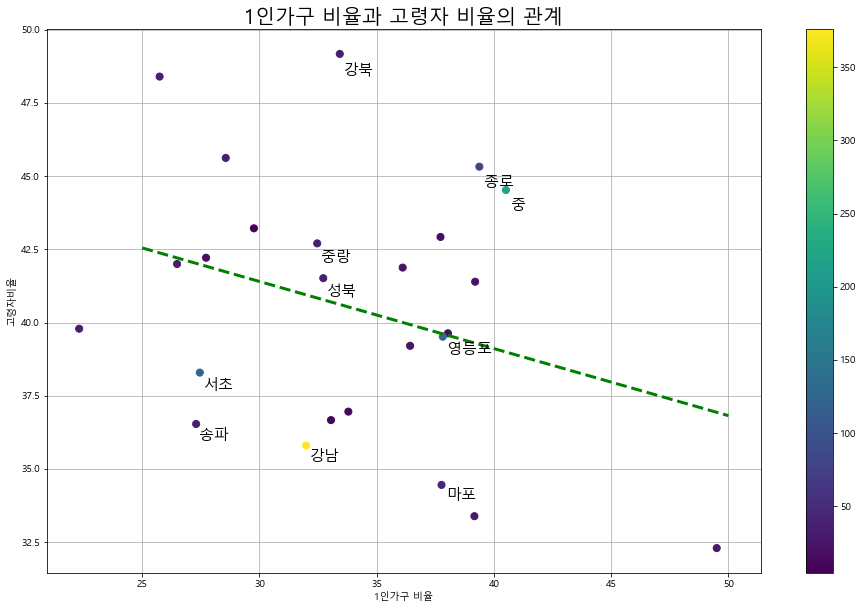

In [209]:
plt.figure(figsize=(16,10))
plt.scatter(df1['1인비율'], df1['고령자비율'], c=df1['오차'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')

for i in range(10): 
    plt.text(df_sort['1인비율'][i]*1.005, df_sort['고령자비율'][i]*0.985,
             df_sort.index[i][:-1], fontsize=15)

plt.grid(True)
plt.title('1인가구 비율과 고령자 비율의 관계', fontsize=20)
plt.xlabel('1인가구 비율')
plt.ylabel('고령자비율')
plt.colorbar()
plt.show()

In [213]:
df1['오차'] = np.abs(df1['대기업'] - f1(df1['1인비율']))
df_sort = df1.sort_values('오차', ascending=False)
df_sort.head()

,총인구수,1인,3인,평균가구원수,1인비율,3인이상,3인이상비율,고령자,세대당인구,고령자비율,사업체수,대기업,사업종사자1인비율,오차
구별,,,,,,,,,,,,,,
강남구,206524,66073,43435,2.4,31.992892,88891,43.041487,73942,2.30,35.803103,67372,417,0.047487,376.053427
중구,54496,22078,9540,2.1,40.513065,17840,32.736348,24265,1.98,44.526204,58766,260,0.068940,221.006468
영등포구,153923,58214,29661,2.2,37.820209,57038,37.056190,60826,2.06,39.517161,40014,171,0.094517,131.389197
서초구,155377,42667,35327,2.5,27.460306,73818,47.508962,59495,2.46,38.290738,42976,168,0.063897,126.014443
종로구,62652,24671,11154,2.2,39.377833,21773,34.752282,28396,2.00,45.323374,37507,120,0.104988,80.746244


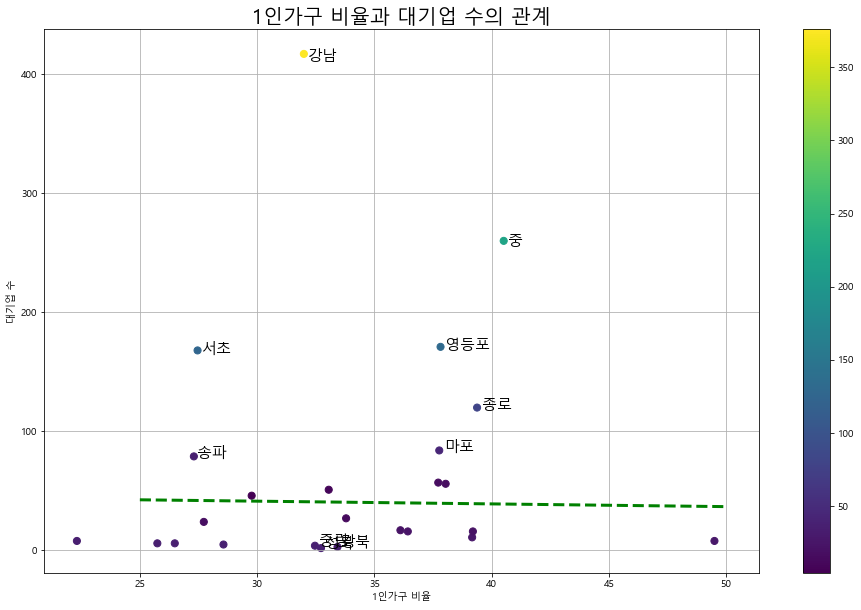

In [214]:
plt.figure(figsize=(16,10))
plt.scatter(df1['1인비율'], df1['대기업'], c=df1['오차'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')

for i in range(10): 
    plt.text(df_sort['1인비율'][i]*1.005, df_sort['대기업'][i]*0.985,
             df_sort.index[i][:-1], fontsize=15)

plt.grid(True)
plt.title('1인가구 비율과 대기업 수의 관계', fontsize=20)
plt.xlabel('1인가구 비율')
plt.ylabel('대기업 수')
plt.colorbar()
plt.show()

In [ ]:
#1인가구는 젋은층이 많고, 대기업의 (중구,종로) 많은 곳에 1인가구 수가 더 많음을 알수있다.
#서초,송파,강남은 (대기업수가 많아도) 3인층의 가족 규모가 많은 것으로 사료된다.